# 온라인 쇼핑몰 매출관계 분석

 - 국가통계포털 https://kosis.kr/search/search.do
 - 온라인쇼핑몰 판매매체별 / 상품군별거래액
 - 합계등을 제외하고 선택(전기전자통신 2020년 전후로 분리되어서 미리 합침)
 - 행렬을 전환

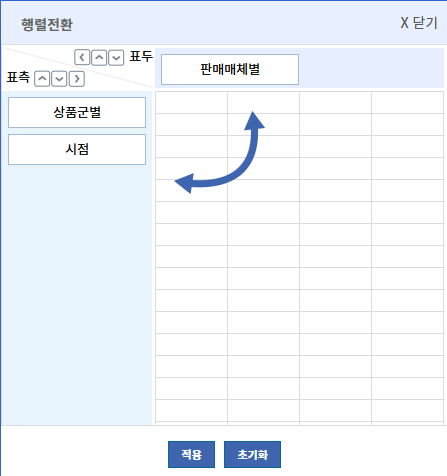


In [17]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
# import matplotlib.date as mdates

import pandas as pd
from datetime import datetime

In [18]:
# font 설정 D2coding
d2_path = "./ref/D2Coding-Ver1.3.2-20180524.ttf"
fm.fontManager.addfont(d2_path)
matplotlib.rcParams["font.family"] = "D2Coding"

In [19]:
file_path = "./ref/온라인쇼핑몰_판매매체별_상품군별거래액.csv"
ori = pd.read_csv(file_path, encoding="EUC-KR") # uft-8
ori.columns = ["category","date","internet","mobile"]
ori.tail()

,category,date,internet,mobile
2203,기타,2024.08,61304,120200
2204,기타,2024.09,63863,126583
2205,기타,2024.10,68403,128216
2206,기타,2024.11 p),73246,135527
2207,기타,2024.12 p),75613,144134


In [5]:
print("수정 전")
print(ori['date'].tail())

ori['date'] = ori['date'].map(lambda x: x.rstrip(' p)'))

print("수정 후")
print(ori['date'].tail())

수정 전
2203       2024.08
2204       2024.09
2205       2024.10
2206    2024.11 p)
2207    2024.12 p)
Name: date, dtype: object
수정 후
2203    2024.08
2204    2024.09
2205    2024.10
2206    2024.11
2207    2024.12
Name: date, dtype: object


In [6]:
ori

,category,date,internet,mobile
0,컴퓨터 및 주변기기,2017.01,288391,133993
1,컴퓨터 및 주변기기,2017.02,329143,146200
2,컴퓨터 및 주변기기,2017.03,322089,151262
3,컴퓨터 및 주변기기,2017.04,251604,116675
4,컴퓨터 및 주변기기,2017.05,241871,109053
...,...,...,...,...
2203,기타,2024.08,61304,120200
2204,기타,2024.09,63863,126583
2205,기타,2024.10,68403,128216
2206,기타,2024.11,73246,135527


In [8]:
ori["date"] = pd.to_datetime(ori["date"], format="%Y.%m")
ori.dtypes
ori.tail()

,category,date,internet,mobile
2203,기타,2024-08-01,61304,120200
2204,기타,2024-09-01,63863,126583
2205,기타,2024-10-01,68403,128216
2206,기타,2024-11-01,73246,135527
2207,기타,2024-12-01,75613,144134


In [10]:
ex1_data = ori.copy()
# ex1_data[ex1_data['category'] == '음식서비스' ]#
obj = ['컴퓨터 및 주변기기','의복','신발','가방', '음식서비스', '음· 식료품', '애완용품', '여행 및 교통서비스']
ex1_data = ex1_data[ex1_data[ 'category'].isin(obj)]
ex1_data.sample(5)

,category,date,internet,mobile
578,가방,2017-03-01,54028,114633
1589,애완용품,2021-06-01,31730,127728
1638,여행 및 교통서비스,2017-07-01,643280,736121
568,신발,2024-05-01,112591,247047
634,가방,2021-11-01,54094,172108


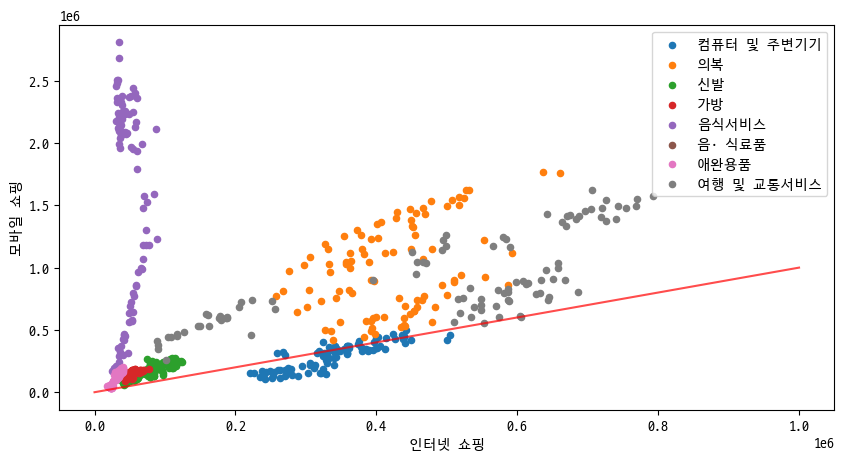

In [20]:
fig , ax = plt.subplots(figsize=(10,5))

category = obj
for cate in category:
    category_data = ex1_data[ex1_data['category'] == cate]
    x_data = category_data['internet']
    y_data = category_data['mobile']
    ax.scatter(x_data,y_data,s = 20, label = cate )

    
ax.set_xlabel("인터넷 쇼핑")
ax.set_ylabel("모바일 쇼핑")
ax.legend(loc="best")
ax.plot([0,1000000],[0,1000000],'r-',alpha=0.7)
plt.show()
# print(category_data,x_data,y_data)

In [13]:
!pip install seaborn

# 선 색깔
- 'k': 검은색 (black)을 의미합니다. Matplotlib에서는 여러 가지 색을 한 글자로 나타낼 수 있습니다.
- 'b': 파란색 (blue)
- 'g': 녹색 (green)
- 'r': 빨간색 (red)
- 'c': 청록색 (cyan)
- 'm': 자홍색 (magenta)
- 'y': 노란색 (yellow)
- 'k': 검은색 (black)
- 'w': 흰색 (white)
# 선종류
- '-': 실선 (solid line)을 의미합니다. 선 스타일에는 다양한 종류가 있습니다.
- '-': 실선 (solid line)
- ' -- ': 파선 (dashed line)
- ' -. ': 점선-파선 혼합 (dash-dot line)
- ':': 점선 (dotted line)
